In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
housing_data = pd.read_csv('./datasets/Housing.csv')

In [3]:
housing_data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
84,6510000,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished
86,6510000,6670,3,1,3,yes,no,yes,no,no,0,yes,unfurnished
220,4795000,8100,4,1,4,yes,no,yes,no,yes,2,no,semi-furnished
101,6230000,5500,3,1,3,yes,no,no,no,no,1,yes,unfurnished
225,4753000,6440,2,1,1,yes,no,no,no,yes,3,no,semi-furnished


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
housing_data.shape

(545, 13)

In [8]:
housing_data.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


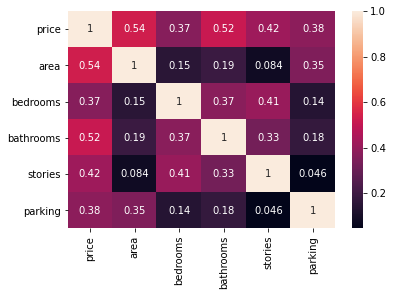

In [9]:
sns.heatmap(housing_data.corr(),annot=True)

In [25]:
housing_data['mainroad'] = housing_data.mainroad.map({'yes':1,'no':0})
housing_data['guestroom'] = housing_data.guestroom.map({'yes':1,'no':0})
housing_data['basement'] = housing_data.basement.map({'yes':1,'no':0})
housing_data['hotwaterheating'] = housing_data.hotwaterheating.map({'yes':1,'no':0})
housing_data['airconditioning'] = housing_data.airconditioning.map({'yes':1,'no':0})
housing_data['prefarea'] = housing_data.prefarea.map({'yes':1,'no':0})

In [26]:
housing_data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
325,4007500,3460,4,1,2,1,0,0,0,1,0,0,semi-furnished
184,5110000,3000,3,2,2,1,1,1,0,0,0,0,furnished
416,3395000,3450,3,1,1,1,0,1,0,0,2,0,unfurnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished


In [29]:
housing_data= pd.get_dummies(housing_data, drop_first=True)

In [30]:
housing_data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
300,4200000,4079,3,1,3,1,0,0,0,0,0,0,1,0
33,8190000,5960,3,3,2,1,1,1,0,0,1,0,0,1
489,2835000,3300,3,1,2,0,0,0,0,0,1,0,1,0
231,4690000,4320,3,1,1,1,0,0,0,0,0,1,1,0
421,3360000,4750,2,1,1,1,0,0,0,0,0,0,0,1


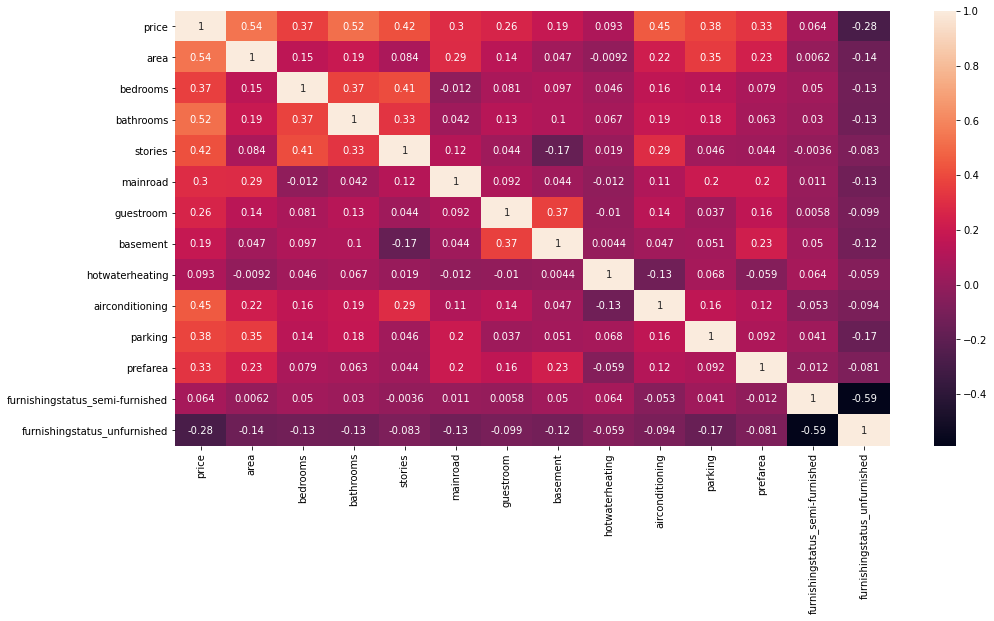

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(housing_data.corr(),annot=True)

In [32]:
def normalize(x):
    return((x-np.min(x))/(max(x)-min(x)))

housing_data = housing_data.apply(normalize)

In [33]:
housing_data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
335,0.187879,0.148866,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0
161,0.321212,0.305842,0.4,0.000000,0.666667,1.0,1.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.0
297,0.212121,0.136770,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0
520,0.060606,0.415808,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
267,0.229697,0.224742,0.4,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.0,0.0


In [34]:
X = housing_data.drop('price',axis=1)

In [35]:
y=housing_data['price']

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=7)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 13)
(109, 13)
(436,)
(109,)


In [41]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)    
lm_1 = sm.OLS(y_train,X_train).fit()

In [42]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     68.88
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.32e-95
Time:                        18:31:03   Log-Likelihood:                 421.71
No. Observations:                 436   AIC:                            -815.4
Df Residuals:                     422   BIC:                            -758.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
X_train = X_train.drop(["bedrooms","furnishingstatus_semi-furnished","basement"], axis=1)


In [ ]:
X_test = sm.add_constant(X_test)
X_test = X_test.drop(["bedrooms","furnishingstatus_semi-furnished","basement"], axis=1)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
y_prediction = lm.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
mean_squared_error(y_prediction,y_test)

0.007924783812280716

In [55]:
r2_score(y_prediction,y_test)

0.5206142285094332

Text(0, 0.5, 'Housing Price')

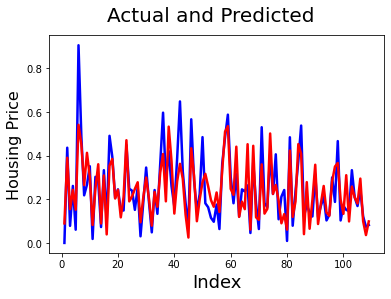

In [59]:
c = [i for i in range(1,110,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     
plt.plot(c,y_prediction, color="red",  linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                            
plt.ylabel('Housing Price', fontsize=16)                